<h3 style='color:green;'>Logistic Regression Algorithm</h3>

Logistic regression is a supervised machine learning algorithm primarily used for binary classification tasks. It predicts the probability of an instance belonging to a specific class, typically a binary outcome like "yes/no" or "0/1". Instead of directly predicting a continuous value like linear regression, it uses a sigmoid function to output a probability between 0 and 1.

<h3 style='color:black;'>1. Input and Output:</h3>

Input:
Logistic regression takes a set of independent variables (features) as input.

Output:
It outputs a probability value between 0 and 1, representing the likelihood of the instance belonging to the positive class. 

<h3 style='color:black;'>2. The Sigmoid Function:</h3>

The core of logistic regression is the sigmoid function, also known as the logistic function. 
It transforms the linear combination of input features into a probability. 
The equation is: P(x) = 1 / (1 + e^(-z)), where z is the linear combination of input features and weights. 

<h3 style='color:black;'>3. Linear Combination: </h3>

Before applying the sigmoid function, a linear equation is used to combine the input features with learned weights.
This linear equation can be represented as: z = b0 + b1*x1 + b2*x2 + ... + bn*xn, where b0 is the bias, and b1 to bn are the weights associated with each feature x1 to xn.

<h3 style='color:black;'>4. Classification: </h3>

After obtaining the probability from the sigmoid function, a threshold (usually 0.5) is used to classify the instance.
If the probability is greater than or equal to the threshold, the instance is classified as belonging to the positive class (e.g., 1).
If the probability is below the threshold, it's classified as belonging to the negative class (e.g., 0).

<h3 style='color:black;'>5. Learning: </h3>

The logistic regression model learns the optimal weights and bias by using techniques like maximum likelihood estimation (MLE).
MLE finds the parameter values that maximize the probability of observing the given training data.

<h3 style='color:black;'>6. Applications: </h3>

Binary classification: Spam detection, fraud detection, disease diagnosis.
Example: Determining if an email is spam (yes/no) based on features like sender, subject, and content.

<h3 style='color:black;'>End-to-end example of logistic regression using Python, including data preprocessing, model training, and evaluation metrics</h3>

We are going to use the famous Iris dataset for this example, but note that logistic regression is typically for binary classification.

Since Iris has 3 classes, we will first convert it to a binary classification problem by selecting two classes (e.g., setosa and versicolor).

Steps:

1. Load the dataset and preprocess: select two classes, split into features and target.

2. Preprocessing: split into train and test sets, and optionally scale the features (though for this dataset it may not be necessary).

3. Train a logistic regression model.

4. Make predictions and evaluate using various metrics.

Alternatively, we can use another dataset that is binary by nature. Let's use the Breast Cancer Wisconsin dataset which is binary.

We'll do:

- Load the Breast Cancer Wisconsin dataset from sklearn.

- Preprocessing: train-test split, scaling.

- Model training with logistic regression.

- Evaluation: accuracy, confusion matrix, classification report (precision, recall, f1-score), ROC-AUC.

<h3 style='color:black;'>Step 1: Import Required Libraries</h3>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix, 
                             classification_report, roc_auc_score, 
                             roc_curve, precision_recall_curve)
import matplotlib.pyplot as plt
import seaborn as sns

<h3 style='color:black;'>Step 2: Load and Explore Dataset (Breast Cancer Wisconsin Dataset)</h3>

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Explore data
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())
print("\nTarget distribution:")
print(df['target'].value_counts(normalize=True))
print("\nMissing values:")
print(df.isnull().sum())

Dataset shape: (569, 31)

First 5 rows:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst

<h3 style='color:black;'>Step 3: Data Preprocessing</h3>

In [3]:
# Split features and target
X = df.drop('target', axis=1)
y = df['target']

# Train-test split (80-20 ratio)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nTraining set size: {X_train_scaled.shape}")
print(f"Test set size: {X_test_scaled.shape}")


Training set size: (455, 30)
Test set size: (114, 30)


<h3 style='color:black;'>Step 4: Model Training</h3>

In [4]:
# Initialize and train logistic regression model
model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42)
model.fit(X_train_scaled, y_train)

# View model coefficients
coef_df = pd.DataFrame({
    'Feature': data.feature_names,
    'Coefficient': model.coef_[0]
}).sort_values('Coefficient', ascending=False)

print("\nTop 5 features:")
print(coef_df.head())


Top 5 features:
                    Feature  Coefficient
5          mean compactness     0.660985
15        compactness error     0.650599
19  fractal dimension error     0.423388
18           symmetry error     0.349244
11            texture error     0.251621


<h3 style='color:black;'>Step 5: Model Evaluation</h3>


Accuracy: 0.9825
ROC AUC: 0.9957


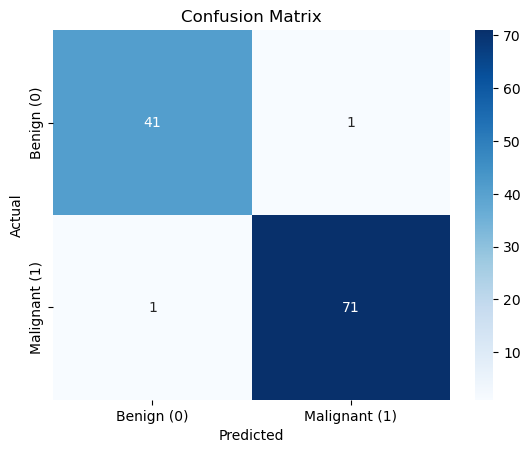


Classification Report:
              precision    recall  f1-score   support

      Benign       0.98      0.98      0.98        42
   Malignant       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



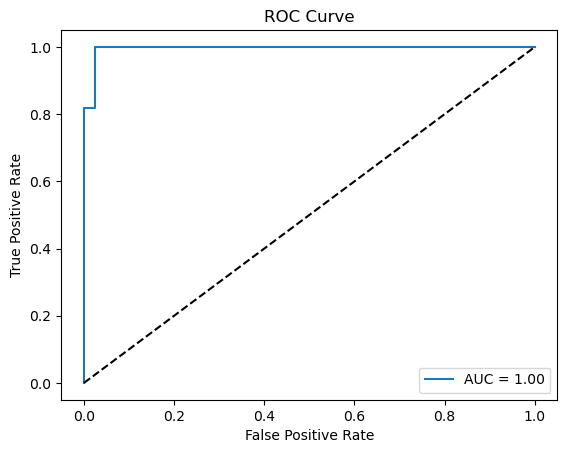

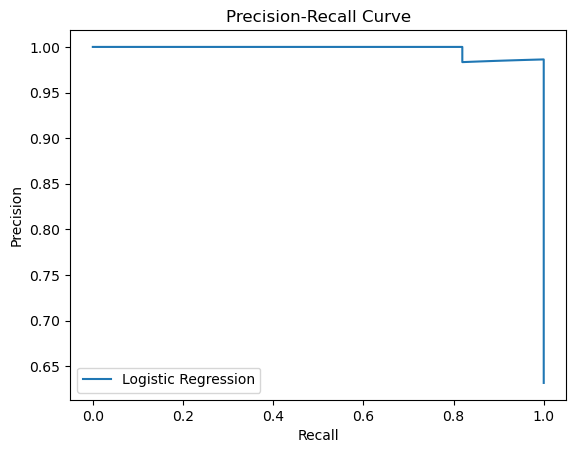

In [5]:
# Predictions
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for class 1

# Basic metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"\nAccuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign (0)', 'Malignant (1)'],
            yticklabels=['Benign (0)', 'Malignant (1)'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.plot(recall, precision, label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

<h3 style='color:black;'>Step 6: Interpretation of Results</h3>

Accuracy: Percentage of correct predictions

Confusion Matrix:

True Negatives (Top-left): Correct benign predictions

False Positives (Top-right): Benign misclassified as malignant

False Negatives (Bottom-left): Malignant misclassified as benign

True Positives (Bottom-right): Correct malignant predictions

Classification Report:

Precision: True positives / (True positives + False positives)

Recall: True positives / (True positives + False negatives)

F1-Score: Harmonic mean of precision and recall

Support: Number of actual occurrences

ROC Curve:

Shows trade-off between sensitivity (TPR) and specificity (1-FPR)

AUC > 0.9 indicates excellent model performance

Precision-Recall Curve:

Particularly useful for imbalanced datasets

Shows trade-off between precision and recall

<h3 style='color:black;'>Key Considerations:</h3>

Feature Scaling: Crucial for logistic regression since it uses gradient descent

Class Imbalance: Our dataset is balanced (62% benign, 38% malignant)

Regularization: We used L2 regularization (ridge) with C=1.0

Feature Importance: Coefficients indicate direction and strength of feature relationships

<h3 style='color:black;'>Common Adjustments:</h3>

Handle class imbalance using class_weight='balanced'

Tune hyperparameters with GridSearchCV:

In [6]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']})

Try different solvers ('newton-cg', 'lbfgs', 'sag', 'saga') for larger datasets


<h3 style='color:black;'>How logistic regression extends to multi-class problems</h3>

Key Approaches for Multi-Class Extension

<h3 style='color:black;'>1. One-vs-Rest (OvR)</h3>

Concept: Train K separate binary classifiers (where K = number of classes). Each classifier predicts whether an instance belongs to one class vs all other classes.

Prediction: For a new instance, all K classifiers are run, and the class with the highest decision score/probability is selected.

Scikit-Learn Usage:

In [7]:
LogisticRegression(multi_class='ovr', solver='liblinear')

LogisticRegression(multi_class='ovr', solver='liblinear')

<h3 style='color:black;'>2. Multinomial (Softmax) Regression</h3>

Concept: Uses a single model that directly generalizes logistic regression to multi-class problems via the softmax function.

Softmax Function:
Computes probabilities for all classes simultaneously

Probabilities sum to 1

Scikit-Learn Usage:

In [8]:
LogisticRegression(multi_class='multinomial', solver='lbfgs')

LogisticRegression(multi_class='multinomial')

<h3 style='color:black;'>End-to-End Multi-Class Example (Iris Dataset)</h3>

<h3 style='color:black;'>Step 1: Import Libraries & Load Data</h3>

In [9]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Load data
iris = load_iris()
X, y = iris.data, iris.target

<h3 style='color:black;'>Step 2: Preprocess Data</h3>

In [10]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<h3 style='color:black;'>Step 3: Train Models</h3>

In [11]:
# Approach 1: One-vs-Rest (OvR)
ovr_model = LogisticRegression(multi_class='ovr', solver='liblinear', max_iter=1000)
ovr_model.fit(X_train, y_train)

# Approach 2: Multinomial (Softmax)
softmax_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
softmax_model.fit(X_train, y_train)

C:\Users\oroni\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\oroni\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

<h3 style='color:black;'>Step 4: Evaluate Models</h3>

In [12]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Evaluate OvR
print("="*50 + "\nOne-vs-Rest (OvR) Results:\n" + "="*50)
evaluate_model(ovr_model, X_test, y_test)

# Evaluate Softmax
print("\n" + "="*50 + "\nMultinomial (Softmax) Results:\n" + "="*50)
evaluate_model(softmax_model, X_test, y_test)

One-vs-Rest (OvR) Results:
Confusion Matrix:
[[10  0  0]
 [ 0  6  4]
 [ 0  1  9]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.86      0.60      0.71        10
   virginica       0.69      0.90      0.78        10

    accuracy                           0.83        30
   macro avg       0.85      0.83      0.83        30
weighted avg       0.85      0.83      0.83        30


Multinomial (Softmax) Results:
Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



<h3 style='color:black;'>Key Outputs Explained</h3>

Confusion Matrix:

In [ ]:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]] 

Rows = True classes, Columns = Predicted classes

Diagonal shows correct predictions

Classification Report:

Precision: TP / (TP + FP)

Recall: TP / (TP + FN)

F1-score: Harmonic mean of precision/recall

Support: Number of actual instances per class

<h3 style='color:black;'>Practical Recommendations</h3>

Default Choice: Use multi_class='multinomial' for theoretical correctness (if solver supports it).

Imbalanced Data: OvR may perform better when classes are highly imbalanced.

Solver Selection:

Small datasets: liblinear (OvR only)

Large datasets: saga or lbfgs (supports both methods)

Probability Calibration: Softmax provides true multi-class probabilities.

<h3 style='color:black;'>Pro Tip</h3>

 Always scale features (using StandardScaler) since logistic regression is sensitive to feature scales.